<a href="https://colab.research.google.com/github/alyshapm/fods/blob/main/wk8_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1: Given the data in the table, do the K-means clustering with k = 3 and initial centroid: C1(1, 10), C2(5, 8) C3(9, 2).

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.DataFrame(
    {'x':[1, 1, 5, 4, 4, 8, 8, 2],
     'y':[5, 2, 8, 8, 9, 3, 2, 1]},
     index=[1, 2, 3, 4, 5, 6, 7, 8])

df.to_csv('df.csv')

In [ ]:
df

,x,y
1,1,5
2,1,2
3,5,8
4,4,8
5,4,9
6,8,3
7,8,2
8,2,1


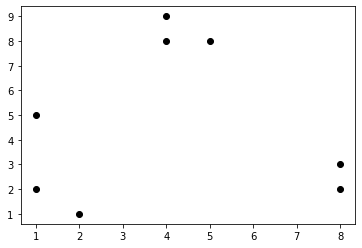

In [ ]:
plt.scatter('x', 'y', data=df, c="black")
plt.show()

In [ ]:
centroids = pd.DataFrame(
    {'x':[1, 5, 9],
     'y':[10, 8, 2]},
     index=[1, 2, 3])

centroids.to_csv('centroids.csv')
centroids

,x,y
1,1,10
2,5,8
3,9,2


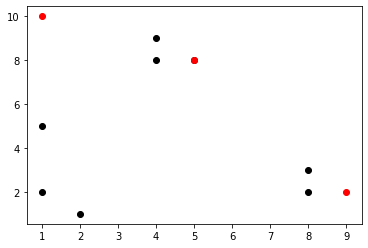

In [ ]:
plt.scatter(df['x'],df['y'], c='black')
plt.scatter(centroids["x"],centroids["y"],c='red')
plt.show()

In [ ]:
K = 3
diff = 1
j=0

while(diff!=0):
    XD=df
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["x"]-row_d["x"])**2
            d2=(row_c["y"]-row_d["y"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1

    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    centroids_new = df.groupby(["Cluster"]).mean()[["x","y"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (centroids_new['x'] - centroids['x']).sum() + (centroids_new['y'] - centroids['y']).sum()
        print(diff.sum())
    centroids = df.groupby(["Cluster"]).mean()[["x","y"]]

2.9166666666666665
0.0


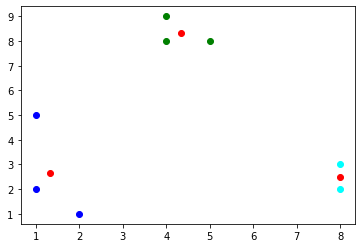

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    new_df=df[df["Cluster"]==k+1]
    plt.scatter(new_df["x"], new_df["y"],c=color[k])
plt.scatter(centroids["x"], centroids["y"],c='red')
plt.show()

In [ ]:
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])

# get centroids
# centroids = kmeans.cluster_centers_
cen_x = [1, 5, 9] 
cen_y = [10, 8, 2]

## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

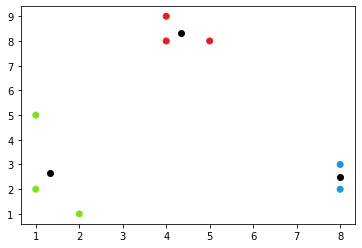

In [ ]:
plt.scatter(df.x, df.y, c=df.c)
plt.scatter(centroids["x"], centroids["y"],c='black')